In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

## K-Means on a randomly generated dataset

In [27]:
np.random.seed(0)

In [28]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [1,1]], cluster_std = 0.9)

Display the scatter plot of the randomly generated data

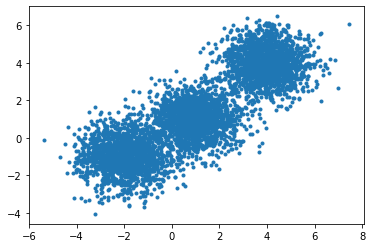

In [29]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Setting up K-Means

In [30]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [31]:
# Fit the KMeans model with the feature matrix created above

k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [32]:
# labels for each point in the model using KMeans.labels_

k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 0, ..., 1, 3, 1])

In [33]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.56370458, -1.26213482],
       [ 3.9597679 ,  3.98753244],
       [ 1.06122681,  1.06057333],
       [-1.11093124, -0.59067704]])

## Creating the Visual Plot

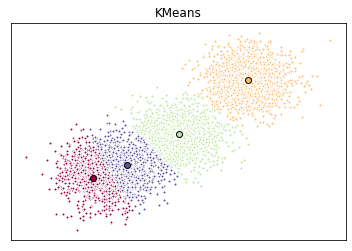

In [34]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
# We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in
for k, col in zip(range(len([[4,4], [-2, -1], [2,-3], [1,1]])), colors):
    
    # create a list of all data points, where the data points that are in the cluster (ex. cluster 0) are labeled as true
    # else they are labeled as false
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()
    
    

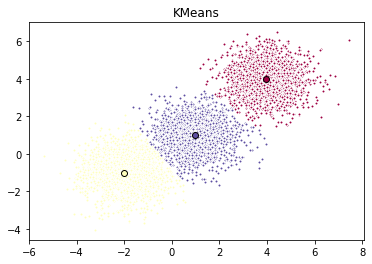

In [35]:
# 3 clusters

k_means2 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means2.fit(X)
k_means_labels2 = k_means2.labels_
k_means_cluster_centers2 = k_means2.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
# We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels2))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in
for k, col in zip(range(len([[4,4], [-2, -1], [2,-3], [1,1]])), colors):
    
    # create a list of all data points, where the data points that are in the cluster (ex. cluster 0) are labeled as true
    # else they are labeled as false
    my_members = (k_means_labels2 == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers2[k]
    
    # plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# show the plot
plt.show()
    
    

# Customer Segmentation with K-Means

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.


## Reading data in

In [38]:
import pandas as pd
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre-processing

In [39]:
# Address column is a categorical variable. K-means algo isnt directly 
# applicable to categorical var becuz the Eucliedean distance fucntion. so drop the column

df = cust_df.drop('Address', axis=1)
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizing over the standard deviation

Normalize the dataset. I use StandardScaler() to normalize the dataset

In [40]:
from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:] # customer id drop
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling

In [42]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

## Insights

In [43]:
df["Clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


C:\Users\angel\AppData\Local\Temp\ipykernel_10436\1408103331.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


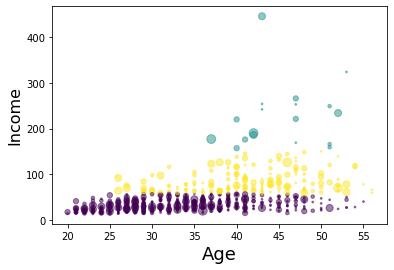

In [44]:
# distribution of customers based on their age and income

area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_10436\3726531985.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect = [0, 0, .95, 1], elev=48, azim=134)
C:\Users\angel\AppData\Local\Temp\ipykernel_10436\3726531985.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float))


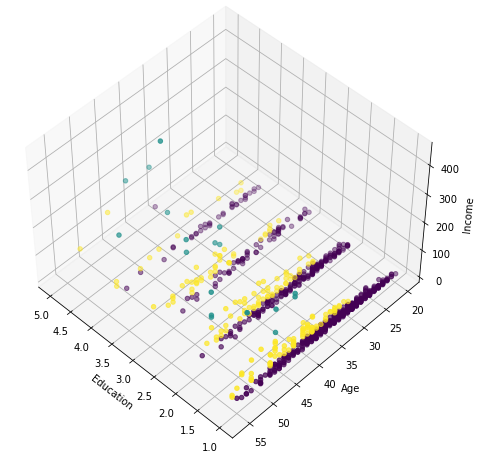

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME
